# GENERALIZATION - UNDEFITTING - OVERFITTING

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
df_bank = pd.read_csv('bankloan.csv')
df_bank.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


### Define Features and Target

In [3]:
X = df_bank[['employ', 'debtinc', 'creddebt', 'othdebt']]
y = df_bank['default']

### Data Splitting

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2020)

### Scaling

In [5]:
scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Modeling KNN

In [6]:
k = range(1,100,2)

training_accuracy = []
testing_accuracy = []

score = 0

for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)

    # predict in train set
    y_pred_train = knn.predict(X_train_scaled)
    acc_train = accuracy_score(y_train, y_pred_train)
    training_accuracy.append(acc_train)

    # predict in test set
    y_pred_test = knn.predict(X_test_scaled)
    acc_test = accuracy_score(y_test, y_pred_test)
    testing_accuracy.append(acc_test) 

    if acc_test > score:
        score = acc_test
        best_k = i  

In [8]:
import warnings
warnings.filterwarnings('ignore')

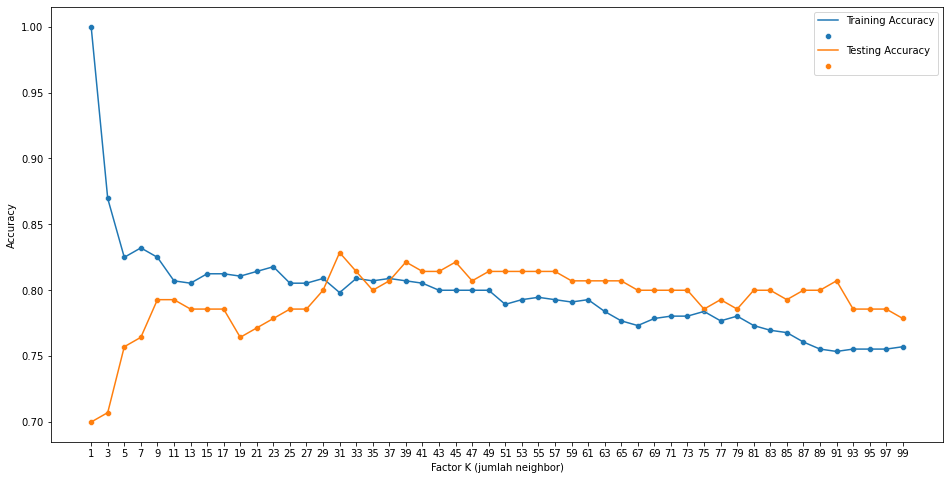

In [12]:
plt.figure(figsize=(16,8))

sns.lineplot(k, training_accuracy)
sns.scatterplot(k, training_accuracy)

sns.lineplot(k, testing_accuracy)
sns.scatterplot(k, testing_accuracy)

plt.legend(['Training Accuracy', '','Testing Accuracy',''])

plt.xlabel('Factor K (jumlah neighbor)')
plt.ylabel('Accuracy')
plt.xticks(k)

plt.show()

In [13]:
print('best k: ', best_k)
print('Accuracy: ', score)

best k:  31
Accuracy:  0.8285714285714286


**Interpretasi overfitting vs underfitting**

1. Pada jumlah k=1, traning accuracy=100% sedangkan testing accuracy hanya 70%. Nilai accuracy yang jauh berbeda antara pada training dan testing menungjukkan overfitting
2. Pada jumlah k 1-7 masih terlihat overfitting
3. Pada jumlah k 49-99 performa model (accuracy) terus menurun, baik pada training maupun testing. Ini menunjukkan underfitting.
4. Kita mencari yang niai testing accuracy nya tinggi, tetapi tidak jauh berbeda dari training accuracy (sweet spot)
5. Jumlah k terbaik adalah 31 dengan nilai accuracy 82.8%

### Modeling Decision Tree

In [21]:
depth = range(1,25)

training_accuracy = []
testing_accuracy = []

score = 0

for i in depth:
    tree = DecisionTreeClassifier(max_depth=i)
    tree.fit(X_train_scaled, y_train)

    # predict in train set
    y_pred_train = tree.predict(X_train_scaled)
    acc_train = accuracy_score(y_train, y_pred_train)
    training_accuracy.append(acc_train)

    # predict in test set
    y_pred_test = tree.predict(X_test_scaled)
    acc_test = accuracy_score(y_test, y_pred_test)
    testing_accuracy.append(acc_test) 

    if acc_test > score:
        score = acc_test
        best_depth = i  

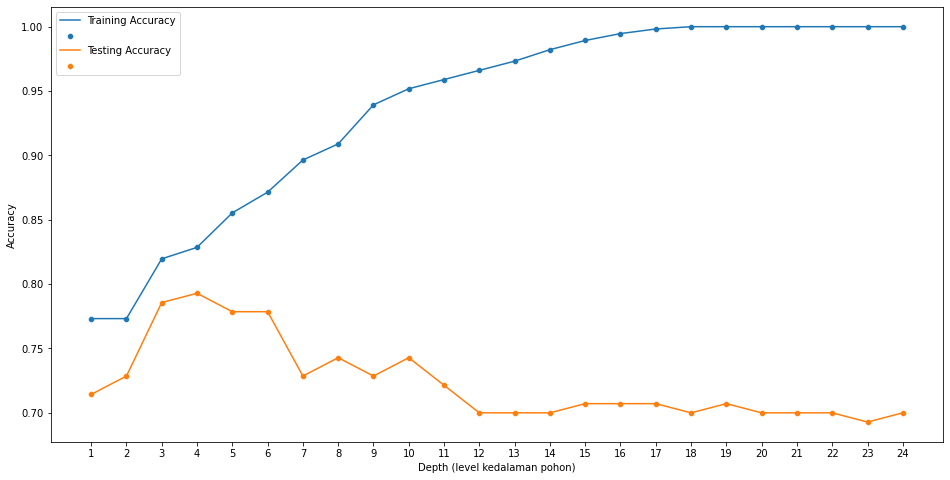

In [22]:
plt.figure(figsize=(16,8))

sns.lineplot(depth, training_accuracy)
sns.scatterplot(depth, training_accuracy)

sns.lineplot(depth, testing_accuracy)
sns.scatterplot(depth, testing_accuracy)

plt.legend(['Training Accuracy', '','Testing Accuracy',''])

plt.xlabel('Depth (level kedalaman pohon)')
plt.ylabel('Accuracy')
plt.xticks(depth)

plt.show()

In [23]:
print('best depth: ', best_depth)
print('Accuracy: ', score)

best depth:  4
Accuracy:  0.7928571428571428


**Interpretasi underfitting vs overfitting**

1. Jumlah depth=1, training accuracy = 0.77 dan testing accuracy = 0.72. Baik accuracy pada training maupun testing sama-sama masih rendah. Ini menujukkan underfitting
2. Jumlah depth 7-24 training acuuracy jauh berbeda dengan testing accuracy. Ini menunjukkan overfitting
3. Kita mencari depth dengan accuracy yang tinggi baik di training maupun testing, dan scorenya tidak berbeda jauh.
4. Jumlah depth terbaik adalah 4 dengan testing accuracy 0.79

# Exercise: Underfitting Overfitting

**Gunakan dataset 'titanic'**

      - Features: 'pclass', 'sex', 'age', 'fare'
      - Target: 'survived'

- Drop missing value pada features yang digunakan jika ada.
- Lakukan data splitting dengan proporsi 80:20 dan random_state = 42

**KNN**
- Lakukan scaling pada data, lihat nilai akurasinya.
- Cari nilai K terbaiknya dengan range 1-150. Interpretasikan hasilnya dan jelaskan overfitting dan underfitting yang terjadi.

**Decision Tree**
- Analisa performa model (overfitting, underfitting, sweet spot) dengan menggunakan hyperparameter berikut:

      - minimum samples split (min_samples_split) dengan range 2-150
      - minimum samples leaf (min_samples_leaf) dengan range 1-150
- Jelaskan juga apa yang dilakukan hyperparameter tersebut beserta interpretasinya.

In [36]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True
